In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random as rd
import math
import myLog
import myTree
import myRandomTree as myRD

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import classification_report


In [7]:
def dataPreparing(dataset, split):
    X1 = dataset[0:71]['Drugs'].values
    Y1 = dataset[0:71]['Weapons'].values
    X2 = dataset[132:205]['Drugs'].values
    Y2 = dataset[132:205]['Weapons'].values

    req_data = []
    for i in range(len(X1)):
        req_data.append([[X1[i], Y1[i]],0])

    for i in range(len(X2)):
        req_data.append([[X2[i], Y2[i]],1])

    trainData =[]
    testData = []
    for i in range (len(req_data)):
        if rd.random() < split:
            trainData.append(req_data[i])
        else:
            testData.append(req_data[i])

    testX = []
    testY = []
    trainX = []
    trainY = []

    for i in range(len(trainData)):
        trainX.append(trainData[i][0])
        trainY.append(trainData[i][1])

    for i in range(len(testData)):
        testX.append(testData[i][0])
        testY.append(testData[i][1])

    trainX = np.array(trainX)
    trainY = np.array(trainY)
    testX = np.array(testX)

    return trainX, trainY, testX, testY

# Логистическая регрессия
Логистическая регрессия — это статистическая модель, используемая для прогнозирования вероятности возникновения некоторого события путём его сравнения с логистической кривой, которая выглядит так:
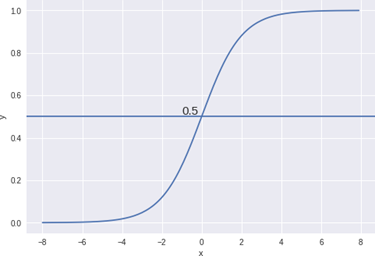
 
Значение сигмоидной функции всегда лежит между 0 и 1. Значение точно равно 0,5 при X = 0. Мы можем использовать 0,5 в качестве порога вероятности для определения классов. Гипотеза для логистической регрессии:
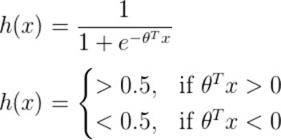
Функция стоимости задается так:
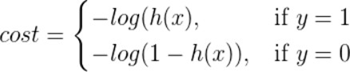
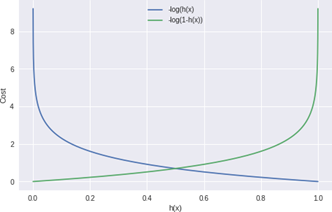

Стоимость всех обучающих примеров:
 
 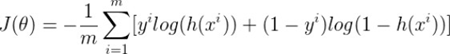

Задача стоит в минимизации этой функции. 

In [8]:
    dataset = pd.read_csv('crime.csv')
    trainX, trainY, testX, testY = dataPreparing(dataset, 0.85)
    model = LogisticRegression(solver='liblinear', random_state=0).fit(trainX, trainY)
    pred = model.predict(testX)
    test_report = classification_report(pred, testY)
    print('sklearn log: \n', pred)
    print('accur: ',model.score(testX,testY))
    print(test_report)

    trainLog = np.c_[np.ones(len(trainX)), trainX]
    testLog = np.c_[np.ones(len(testX)), testX]
    theta = np.zeros((trainLog.shape[1], 1))
    param = myLog.fit(trainLog, trainY, theta)
    res = myLog.prediction(testLog, param)
    pred_class = myLog.predict(res)
    test_report = classification_report(pred_class, testY)
    print('my log:\n', pred_class)
    print('my accur: ', myLog.accur(res, testY))
    print(test_report)

    res = myLog.prediction(trainLog, param)
    pred_class = myLog.predict(res)
    print('LR train:', myLog.accur(pred_class, trainY))

sklearn log: 
 [0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
accur:  0.6111111111111112
              precision    recall  f1-score   support

           0       0.29      0.50      0.36         4
           1       0.82      0.64      0.72        14

    accuracy                           0.61        18
   macro avg       0.55      0.57      0.54        18
weighted avg       0.70      0.61      0.64        18

my log:
 [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]
my accur:  0.6666666666666666
              precision    recall  f1-score   support

           0       0.29      0.67      0.40         3
           1       0.91      0.67      0.77        15

    accuracy                           0.67        18
   macro avg       0.60      0.67      0.58        18
weighted avg       0.81      0.67      0.71        18

LR train: 0.6904761904761905



# Дерево решений
Дерево решений — в основном жадное, нисходящее, рекурсивное разбиение. Энтропия — это мера случайности или неопределенности. Уровень энтропии колеблется от 0 до 1. Для меры энтропии используют примесь Джини. Узел чистый, если все его выборки принадлежат одному и тому же классу, в то время как узел с множеством выборок из разных классов будет иметь Джини ближе к 1.
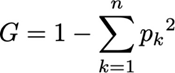
Каждый узел делит выборку таким образом, что примесь Джини у детей (точнее, среднее значение Джини у детей, взвешенных по их размеру) сводится к минимуму. Рекурсия останавливается, когда, достигается максимальная глубина, или когда нет разделения, которое может привести к двум детям, чище, чем их родитель.


In [9]:
    model=tree.DecisionTreeClassifier()
    model.fit(trainX,trainY)
    pred = model.predict(testX)
    print('sklearn Dtree: \n')
    print(pred)
    print('accur: ')
    print(model.score(testX,testY))
    test_report = classification_report(pred, testY)
    print(test_report)

    model = myTree.DecisionTreeClassifier(max_depth=5)
    model.fit(trainX, trainY)
    pred = model.predict(testX)
    print('my Dtree: \n')
    print(pred)
    print('my accur: ', myLog.accur(pred, testY))
    test_report = classification_report(pred, testY)
    print(test_report)

    pred_class = model.predict(trainX)
    print('DT train:', myLog.accur(pred_class, trainY))

sklearn Dtree: 

[0 0 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1]
accur: 
0.7222222222222222
              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.73      0.80      0.76        10

    accuracy                           0.72        18
   macro avg       0.72      0.71      0.71        18
weighted avg       0.72      0.72      0.72        18

my Dtree: 

[0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1]
my accur:  0.6111111111111112
              precision    recall  f1-score   support

           0       0.57      0.50      0.53         8
           1       0.64      0.70      0.67        10

    accuracy                           0.61        18
   macro avg       0.60      0.60      0.60        18
weighted avg       0.61      0.61      0.61        18

DT train: 0.7777777777777778


# Случайный лес
Random forest — это множество решающих деревьев. В задаче регрессии их ответы усредняются, в задаче классификации принимается решение голосованием по большинству. Все деревья строятся независимо по следующей схеме:

•	Выбирается подвыборка обучающей выборки – по ней строится дерево (для каждого дерева — своя подвыборка).
•	Для построения каждого расщепления в дереве просматриваем max_features случайных признаков (для каждого нового расщепления
— свои случайные признаки).
•	Выбираем наилучшие признаки и расщепляем по нему. Дерево строится, как правило, до исчерпания выборки (пока в листьях не останутся представители только одного класса.
Собственная реализация и sklearn совпадают. 


In [10]:
    model = RandomForestClassifier(n_estimators=10)
    model.fit(trainX, trainY)
    pred = model.predict(testX)
    print('sklearn RF: \n')
    print(pred)
    print('accur: ')
    print(model.score(testX,testY))
    test_report = classification_report(pred, testY)
    print(test_report)

    model = myRD.RandomTreeClassifier(5)
    model.fit(trainX, trainY)
    pred = model.predict(testX)
    print('my RF: \n')
    print(pred.astype(int))
    print('my accur: ', myLog.accur(pred, testY))
    test_report = classification_report(pred, testY)
    print(test_report)

    pred_class = model.predict(trainX)
    print('RF train:', myLog.accur(pred_class, trainY))

sklearn RF: 

[0 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1]
accur: 
0.7222222222222222
              precision    recall  f1-score   support

           0       0.57      0.67      0.62         6
           1       0.82      0.75      0.78        12

    accuracy                           0.72        18
   macro avg       0.69      0.71      0.70        18
weighted avg       0.74      0.72      0.73        18

my RF: 

[0 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1]
my accur:  0.7777777777777778
              precision    recall  f1-score   support

         0.0       0.71      0.71      0.71         7
         1.0       0.82      0.82      0.82        11

    accuracy                           0.78        18
   macro avg       0.77      0.77      0.77        18
weighted avg       0.78      0.78      0.78        18

RF train: 0.9444444444444444


# Выводы 
Оценка применимости зависит от размера выбранного датасета и количества параметров. Логистическая регрессия в данном случает подходит лучше всех, потому что данные изначально разделены на 2 класса. Дерево решений также подходит, так как датасет невелик и имеет малое количество параметров, поэтому производится меньше вычислений и оно быстрее строится. Случайный лес в нашем случае плохо применим из-за малого количества параметров, потому что его идея как раз состоит в случайном выборе параметров, тем более, если мы убираем один параметров, мы теряем в точности. 